#Advanced Neural Networks: Deep Learning for Sequential Analysis - Assignment 2: Temperature Sequence Prediction using RNN and BPTT in PyTorch

#Rhichard Koh

# Assignment 2: Temperature Sequence Prediction using RNN and BPTT in PyTorch

**Total Marks: 100**

### Instructions:
In this assignment, you'll implement a Recurrent Neural Network (RNN) in PyTorch and use it to predict daily temperatures.
Follow the provided steps and fill in each section as directed.
Submit your completed notebook with all outputs for grading.

## Scenario
Imagine you are working as a data scientist for a climate research organization. You have been tasked with developing a model to predict daily average temperatures based on past temperature sequences.
Your goal is to use an RNN to predict the next temperature in a sequence, a common task in time-series forecasting.
This assignment will help you apply RNNs with Backpropagation Through Time (BPTT) to learn dependencies in sequential data.

### Step 1: Import Libraries (5 Marks)

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch.optim as optim

### Step 2: Generate the Dataset and Normalize it (10 Marks)

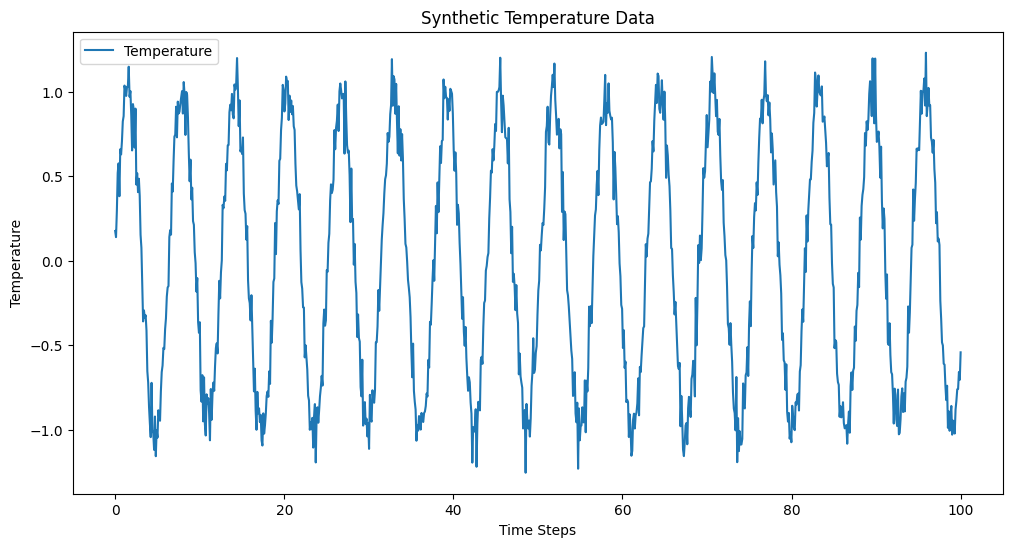

In [2]:
np.random.seed(0)
time_steps = np.linspace(0, 100, 1000)  # 1000 time steps
temperature = np.sin(time_steps) + np.random.normal(scale=0.1, size=len(time_steps))
plt.figure(figsize=(12, 6))
plt.plot(time_steps, temperature, label='Temperature')
plt.title('Synthetic Temperature Data')
plt.xlabel('Time Steps')
plt.ylabel('Temperature')
plt.legend()
plt.show()

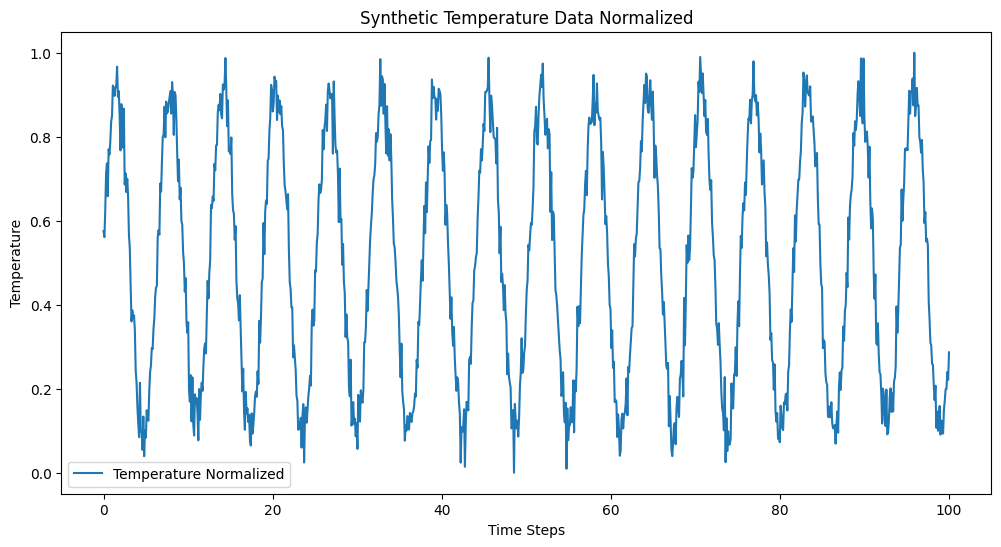

In [3]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
temperature_normalized = scaler.fit_transform(temperature.reshape(-1, 1))
plt.figure(figsize=(12, 6))
plt.plot(time_steps, temperature_normalized, label='Temperature Normalized')
plt.title('Synthetic Temperature Data Normalized')
plt.xlabel('Time Steps')
plt.ylabel('Temperature')
plt.legend()
plt.show()

### Step 3: Create Sequences and Labels (10 Marks)

In [4]:
seq_length = 20  # The length of each input sequence

# Create sequences and labels
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Create sequences and labels using the normalized temperature data
x_data, y_data = create_sequences(temperature_normalized, seq_length)

# Convert the data into PyTorch tensors
x_data = torch.from_numpy(x_data).float()
y_data = torch.from_numpy(y_data).float()

# Print the shape of the created data to confirm
print(f"Input shape: {x_data.shape}")
print(f"Label shape: {y_data.shape}")


Input shape: torch.Size([980, 20, 1])
Label shape: torch.Size([980, 1])


### Step 4: Define the RNN Model (20 Marks)

In [5]:
class TemperatureRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1, num_layers=1):
        super(TemperatureRNN, self).__init__()

        # RNN layer
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)

        # Fully connected output layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(1, x.size(0), 50)

        # RNN forward pass
        out, _ = self.rnn(x, h0)

        # Use only the last time step's hidden state to predict the output
        out = self.fc(out[:, -1, :])

        return out

# Define model parameters
input_size = 1
hidden_size = 50
output_size = 1
num_layers = 1

# Instantiate the model
model = TemperatureRNN(input_size, hidden_size, output_size, num_layers)

# Print model summary
print(model)


TemperatureRNN(
  (rnn): RNN(1, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


### Step 5: Train the Model with BPTT (40 Marks)

Epoch [10/100], Loss: 0.0033
Epoch [20/100], Loss: 0.0019
Epoch [30/100], Loss: 0.0040
Epoch [40/100], Loss: 0.0012
Epoch [50/100], Loss: 0.0016
Epoch [60/100], Loss: 0.0017
Epoch [70/100], Loss: 0.0021
Epoch [80/100], Loss: 0.0028
Epoch [90/100], Loss: 0.0012
Epoch [100/100], Loss: 0.0017


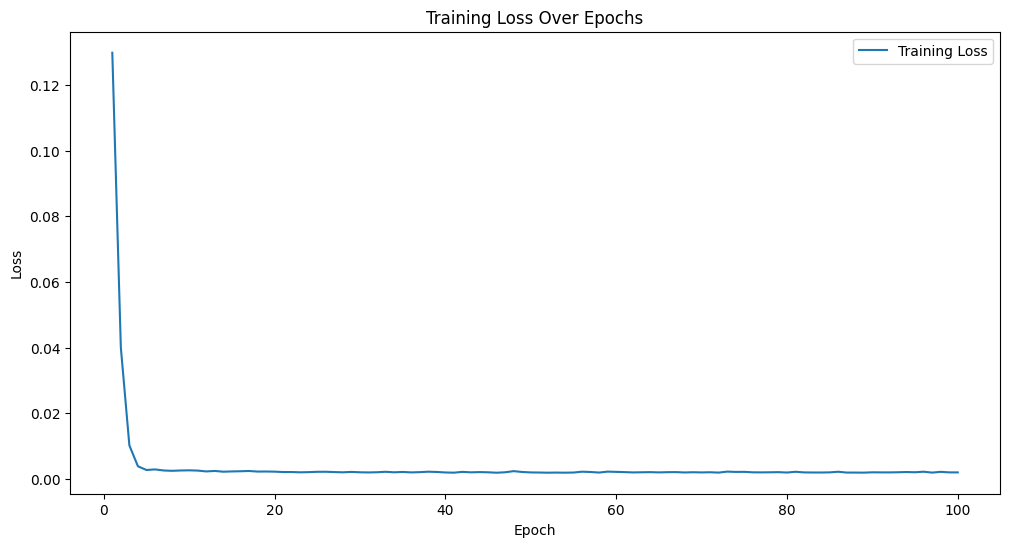

In [6]:
# Define training parameters
learning_rate = 0.001
num_epochs = 100
batch_size = 32

# Loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Prepare DataLoader for mini-batch training
train_data = torch.utils.data.TensorDataset(x_data, y_data)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

# List to store the loss for each epoch
training_losses = []

# Training the model
for epoch in range(num_epochs):
  epoch_loss = 0  # Initialize the loss for this epoch
  for x_batch, y_batch in train_loader:
      # Forward pass
      outputs = model(x_batch)
      loss = criterion(outputs, y_batch)

      # Backward pass and optimization
      optimizer.zero_grad()
      loss.backward()  # Backpropagation Through Time (BPTT)
      optimizer.step()

      # Accumulate the loss for this epoch
      epoch_loss += loss.item()

  # Average loss for the epoch
  avg_epoch_loss = epoch_loss / len(train_loader)
  training_losses.append(avg_epoch_loss)

  # Print loss every 10 epochs
  if (epoch + 1) % 10 == 0:
      print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


# Plot the training loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

### Step 5: Train the Model with BPTT with Gradient Clipping (40 Marks)

Epoch [10/100], Loss: 0.0023
Epoch [20/100], Loss: 0.0022
Epoch [30/100], Loss: 0.0021
Epoch [40/100], Loss: 0.0022
Epoch [50/100], Loss: 0.0020
Epoch [60/100], Loss: 0.0021
Epoch [70/100], Loss: 0.0022
Epoch [80/100], Loss: 0.0022
Epoch [90/100], Loss: 0.0020
Epoch [100/100], Loss: 0.0021


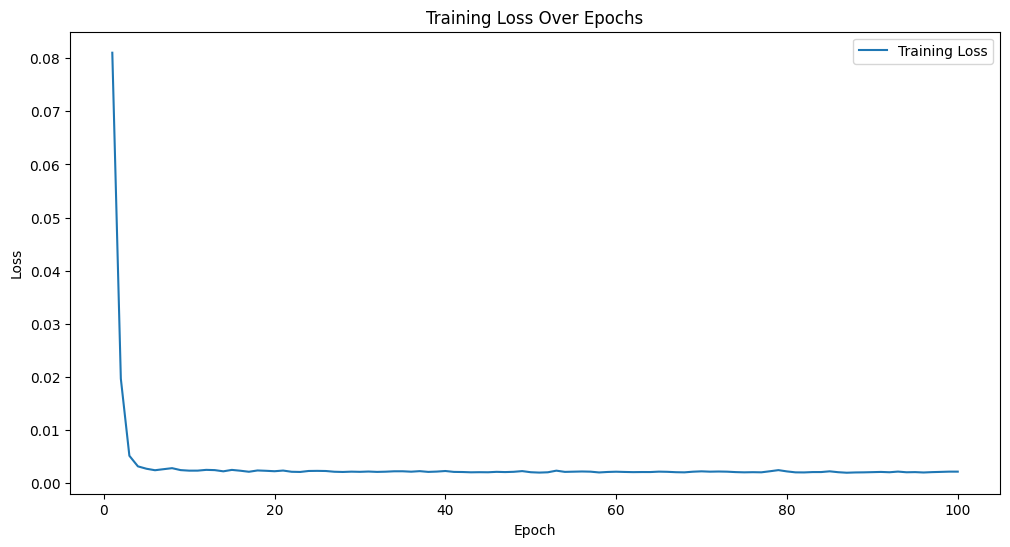

In [9]:
# Define training parameters
learning_rate = 0.001
num_epochs = 100
batch_size = 32
clip_value = 1.0  # Gradient clipping value

# Loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Prepare DataLoader for mini-batch training
train_data = torch.utils.data.TensorDataset(x_data, y_data)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

# List to store the loss for each epoch
training_losses = []

# Reset model parameters before training
def reset_model_parameters(model):
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

reset_model_parameters(model)

# Training the model
for epoch in range(num_epochs):
    epoch_loss = 0  # Initialize the loss for this epoch
    for x_batch, y_batch in train_loader:
        # Forward pass
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()  # Backpropagation Through Time (BPTT)

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)

        optimizer.step()

        # Accumulate the loss for this epoch
        epoch_loss += loss.item()

    # Average loss for the epoch
    avg_epoch_loss = epoch_loss / len(train_loader)
    training_losses.append(avg_epoch_loss)

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# Plot the training loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


### Step 6: Evaluate the Model (15 Marks)

Test Loss: 0.0019


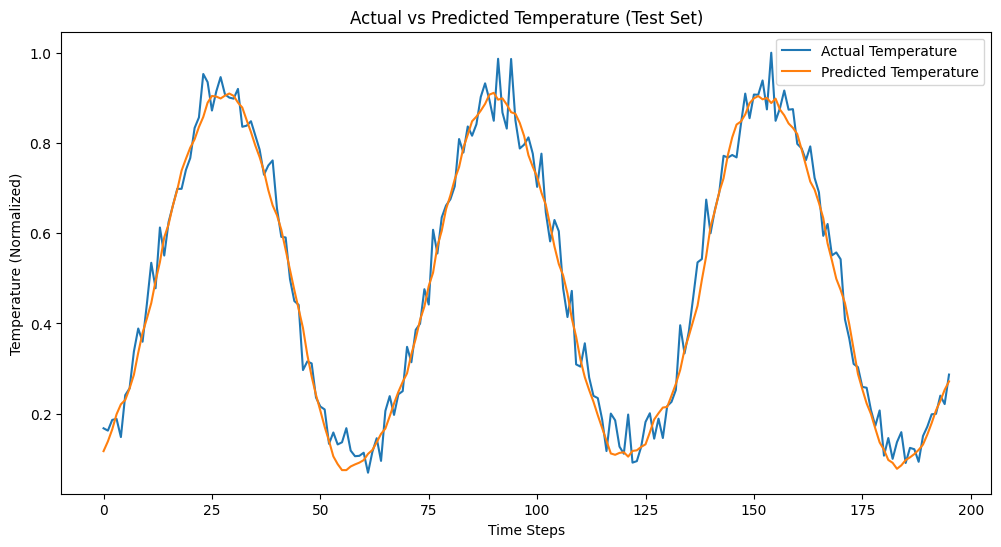

In [10]:
# Split the data into training and testing datasets (80% training, 20% testing)
train_size = int(len(x_data) * 0.8)
test_size = len(x_data) - train_size

# Training and testing data
train_x, test_x = x_data[:train_size], x_data[train_size:]
train_y, test_y = y_data[:train_size], y_data[train_size:]

# Evaluate the model using the testing set
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient calculation for evaluation
    # Make predictions for the test set
    test_predictions = model(test_x)
    loss = criterion(test_predictions, test_y)

    # Print the loss value for the test set
    print(f'Test Loss: {loss.item():.4f}')

    # Convert predictions and true values to numpy for plotting
    test_predictions_np = test_predictions.numpy()
    test_y_np = test_y.numpy()

# Plot the actual vs predicted temperature values for the test set
plt.figure(figsize=(12, 6))
plt.plot(range(len(test_y_np)), test_y_np, label='Actual Temperature')
plt.plot(range(len(test_predictions_np)), test_predictions_np, label='Predicted Temperature')
plt.title('Actual vs Predicted Temperature (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (Normalized)')
plt.legend()
plt.show()


### Step 7: Reflection Questions (10 Marks)
Answer the following questions based on your results:

1. What challenges did you face while implementing BPTT for training this RNN? How did gradient clipping help?
2. How well did the model perform on test data? What changes might improve its performance?
3. Given more complex architectures, how might you improve sequence prediction for larger datasets?

1. What challenges did you face while implementing BPTT for training this RNN? How did gradient clipping help?

A number of issues arise most frequently when training an RNN by BPTT, in particular, with respect to the behavior of the gradients. Gradients are utilized in updating the parameters of the model and sometimes get too small. One problem with the vanishing gradients is that while doing the process of backpropagation, they become very small; this causes learning that span over a very long time to be problematic. This may prevent the model from getting meaningful details from the further past. On the other hand, exploding gradients occur when gradients grow too large, and this may lead to instability during training; thus, updates might become too large for the model. Other difficulties include the fact that training RNNs on very long sequences may be quite time and memory-consuming since BPTT keeps information for every moment in time. This makes it hard for the model to learn from longer sequences and usually leaves the model biased toward newer data, without considering perhaps more crucial information from further back in the sequence. Gradient clipping helps to alleviate the issue of exploding gradients by clamping a threshold on how large gradients can become; if they surpass that threshold, they scale down toward a range that is manageable and prohibits instability during training. This will help to stabilize the training process, because it doesn't allow too-large steps and abrupt changes which may destabilize the model. Thanks to the gradient clipping, the RNN managed to train smoothly and was able to learn useful patterns from the data.

2. How well did the model perform on test data? What changes might improve its performance?

The model performed quite well on the test data, with a low test loss of 0.0021, indicating that it is accurately predicting temperature values and effectively capturing the underlying relationships in the data. While this is a promising result, there are still ways to potentially enhance the model's performance. Switching to a more advanced RNN variant, such as LSTM or GRU, could help capture long-term dependencies better, especially if there are seasonal patterns. Increasing the model's complexity by adding more hidden layers or units could also help in learning more intricate relationships. Adding additional features like day of the year or humidity could provide more context, improving predictions. Fine-tuning hyperparameters, such as learning rate or batch size, might lead to further improvements, and adding regularization techniques like dropout or L2 regularization could prevent overfitting. Finally, early stopping can ensure that the model stops training as soon as it starts overfitting. By applying one or a combination of these strategies, the model's accuracy and robustness could be further enhanced, especially if precise predictions are needed.

3. Given more complex architectures, how might you improve sequence prediction for larger datasets?

To improve sequence prediction for larger datasets using more complex architectures, several strategies can be employed. Advanced models like LSTMs, GRUs, or even Transformers are well-suited for capturing both short-term and long-term dependencies, with Transformers particularly effective for large datasets due to their attention mechanisms that focus on relevant parts of the sequence. Increasing model complexity by stacking multiple LSTM or RNN layers, or combining RNNs with convolutional layers, can help capture more intricate temporal patterns. Efficient training techniques, such as data parallelism, distributed training, and mixed precision, can speed up the process and make handling large datasets more feasible. Regularization methods, like dropout and L2 regularization, are also important to prevent overfitting, especially in complex models, while gradient clipping can keep training stable by limiting excessive gradient values. Additionally, data preprocessing and feature engineering, such as adding new features or decomposing time series components, can help the model better understand the data structure. These combined strategies can greatly enhance the effectiveness and robustness of sequence prediction models for large and complex datasets.